In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creamos un vector

x = np.linspace(1,10,num = 10)
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [3]:
x.shape

(10,)

In [4]:
# generar un modelo lineal y = mX + b

y = 2*x + 32

pd.DataFrame({'feature':x
              ,'target':y})

,feature,target
0,1.0,34.0
1,2.0,36.0
2,3.0,38.0
3,4.0,40.0
4,5.0,42.0
5,6.0,44.0
6,7.0,46.0
7,8.0,48.0
8,9.0,50.0
9,10.0,52.0


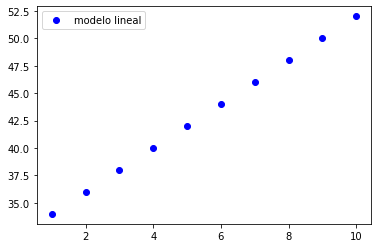

In [5]:
plt.plot(x,y,'bo',label ='modelo lineal')
plt.legend()
plt.show()

In [6]:
import tensorflow as tf

In [7]:
# creamos la capa de entrada
capa = tf.keras.layers.Dense(units = 1,input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [8]:
# mse indicador que significa mejor es tener muchos errores pequeños
# que pocos errores grandes
# lr = 0.1

modelo.compile(
optimizer = tf.keras.optimizers.Adam(0.1),
loss ='mean_squared_error'
)

In [9]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
# entrenamiento del modelo
historial = modelo.fit(x,y,epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 488ms/step - loss: 1621.1666
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 1567.2012
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 1514.2740
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 1462.4016
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 1411.6006
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 1361.8865
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 1313.2725
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 1265.7715
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 1219.3951
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 1174.1531
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 1130.0541
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 1087.1049
Epoch 13/

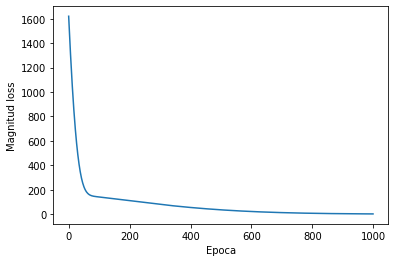

In [11]:
# como se comporta el error en el tiempo

plt.xlabel('Epoca')
plt.ylabel('Magnitud loss')
plt.plot(historial.history['loss'])

In [12]:
capa.get_weights()

[array([[2.406313]], dtype=float32), array([29.223463], dtype=float32)]

In [13]:
# y = 2X + 32
resultado = modelo.predict([5])
resultado

array([[41.255028]], dtype=float32)

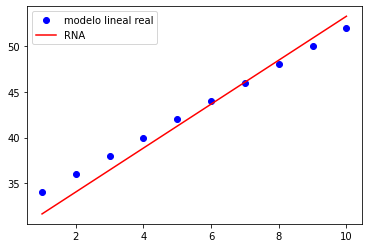

In [14]:
plt.plot(x,y,'bo',label ='modelo lineal real')
plt.plot(x,modelo.predict(x),color='red',label='RNA')
plt.legend()
plt.show()

# Mismos datos diferente N.net

In [15]:
# otro modelo
h1 = tf.keras.layers.Dense(units=3,input_shape=[1])
h2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units = 1)
modelo1 = tf.keras.Sequential([h1,h2,salida])

In [16]:
modelo1.compile(
optimizer = tf.keras.optimizers.Adam(0.1),
loss ='mean_squared_error'
)

In [17]:
modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 6         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [18]:
# entrenando el modelo
historial1 = modelo1.fit(x,y,epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 387ms/step - loss: 2601.2458
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 2137.0098
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 1795.6692
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 1482.9011
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 1160.5857
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 829.6510
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 513.1473
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 260.8300
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 151.6157
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 251.5047
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 437.6869
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 483.8998
Epoch 13/1000
1/1

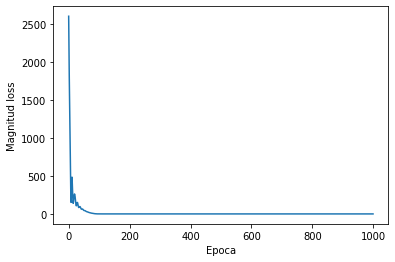

In [19]:
plt.xlabel('Epoca')
plt.ylabel('Magnitud loss')
plt.plot(historial1.history['loss'])

In [20]:
# y = 2X+32
resultado1 = modelo1.predict([5])
resultado1

array([[42.000004]], dtype=float32)

In [21]:
print(h1.get_weights())
print(h2.get_weights())
print(salida.get_weights())

[array([[-0.05060849,  0.49765447,  0.6650298 ]], dtype=float32), array([-3.0539548,  0.6648374,  3.5836966], dtype=float32)]
[array([[-1.5108374 ,  0.408196  , -0.67164147],
       [-0.35322785,  0.5162491 ,  0.24473275],
       [ 1.050593  , -1.2970614 ,  0.9567092 ]], dtype=float32), array([ 2.9452298, -2.097548 ,  3.1715112], dtype=float32)]
[array([[ 1.473064  ],
       [-0.70427966],
       [ 0.85351795]], dtype=float32), array([2.7545292], dtype=float32)]


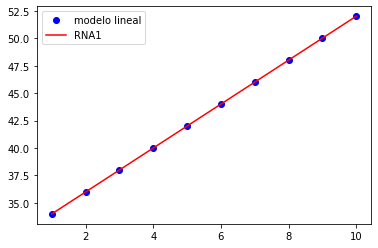

In [22]:
plt.plot(x,y,'bo',label ='modelo lineal')
plt.plot(x,modelo1.predict(x),color='red',label='RNA1')
plt.legend()
plt.show()